# Overview of Neural Networks

Neural networks are computational models inspired by the human brain. They consist of layers of interconnected neurons where each connection represents a weight, and each neuron applies a transformation to its inputs. These models can learn complex relationships in data, making them suitable for various applications in supervised learning.

## Introduction to Dense Neural Networks

Dense neural networks, also known as fully connected networks, comprise multiple layers where each neuron in one layer connects to every neuron in the next layer. This structure allows the network to learn deep representations of the data, capturing complex relationships between inputs and outputs.

### Formula for Output Calculation:
Each neuron's output is calculated using the formula:
$$
\text{Output} = f\left(\sum_{i=1}^{n} w_i \cdot x_i + b\right)
$$
where:
- $w_i$ is the weight applied to the i-th input $x_i$
- $b$ is the bias
- $f$ is the activation function.


## Acitvation Functions

Activation functions introduce non-linearity to the model, enabling the network to learn complex patterns:

- Sigmoid: Provides outputs between 0 and 1, often used for binary classifications.
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

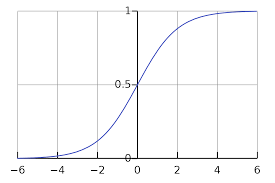

- Tanh (Hyperbolic Tangent): Outputs values between -1 and 1, better for centering data.
$$
\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

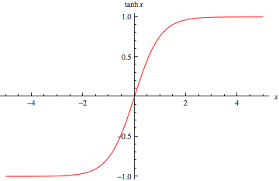

- ReLU (Rectified Linear Unit): Outputs the input directly if it is positive, otherwise, it outputs zero. It is efficient and commonly used in deep learning.
$$
\text{ReLU}(x) = \max(0, x)
$$

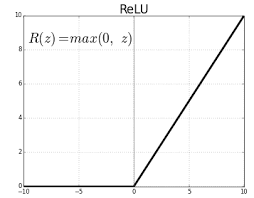

- Softmax: Converts the outputs to probabilities, useful for multi-class classification.
$$
\text{Softmax}(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

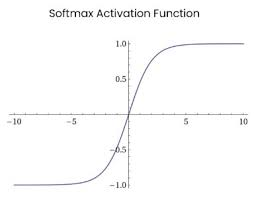

where $z_i$ is the i-th component of the input vector $z$, and the denominator is the sum of the exponential of all components of $z$, normalizing the output to a probability distribution.

Each activation function has unique characteristics that influence the behavior of the network during training.

## Training Neural Networks: Feedforward and Backpropagation
### Feedforward Phase
During the feedforward phase, inputs are passed through the network, layer by layer, until the output layer is reached. This phase involves the sequential computation of each layer’s outputs based on the current weights and biases.

### Backpropagation Phase
Backpropagation adjusts the weights and biases of the network to minimize the loss function. It involves:

1. Computing the gradient of the loss function concerning each weight and bias through the chain rule.
2. Adjusting the weights and biases in the direction that reduces the error (gradient descent).

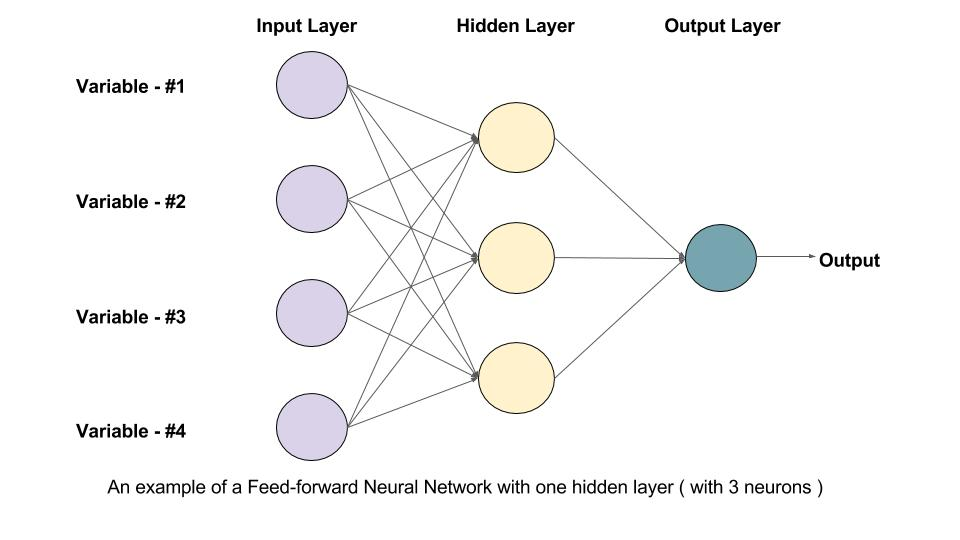

### Learning Rate
The learning rate determines the step size during gradient descent. Choosing the right learning rate is crucial for efficient and effective training.

## Hyperparameters Optimization
The performance of a neural network can be significantly influenced by its hyperparameters:

- Number of Layers and Size of Each Layer: More layers and neurons can model more complex functions but increase the risk of overfitting.
- Activation Functions: Different functions can alter the learning dynamics and the ability of the network to converge.
- Learning Rate: Affects how quickly the network learns and stabilizes.

Optimizing these hyperparameters often requires experimentation and tuning based on the specific data and task.



## Advantages and Disadvantages of Neural Networks
### Advantages
- Capability to Learn Non-linear Relationships: Makes them powerful for complex tasks like image and speech recognition.
- Scalability and Adaptability: Effective at handling large and diverse datasets.

### Disadvantages
- Computationally Intensive: Requires significant computational resources, especially as networks become deeper and more complex.
- Overfitting Risk: Especially with insufficient data.
- Difficult to Interpret: Neural networks are often considered "black boxes" because it can be challenging to understand how decisions are derived.

### Example Usage
I'm going to demonstrate an example Neural Network Model on both Regression (Real Estate Valuation) and Classification (Breast Cancer). Our first example is the Real Estate valuation dataset.

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [4]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

X = X.values
y = y.values


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Like when we did Linear Regression, our X values can vary drastically in size, so we need to scale it in order for the training to properly work.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Here we split up our data into 'Training' and 'Testing'. We use 20% of the data to train our neural network, and the other 80% to test/provide feedback on the trained model.

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


Let's have a summary of why we chose this architecture:

1. Number of Layers and Neurons

- Three Dense Layers: The choice of three layers is a balance between model complexity and computational efficiency. Having multiple layers (a "deep" network) allows the model to learn more complex patterns in the data.
- Neurons in Each Layer: The first layer has 128 neurons, and the next two have 64 neurons each. This "funnel" or decreasing structure (from input towards output) can help the model in forming a hierarchical representation of the data. The higher number of neurons in the initial layers allows the model to capture a wide variety of features, and the reduction helps in distilling these down to the features most relevant for prediction.

2. Activation Functions

- ReLU Activation: ReLU is used for the hidden layers. ReLU helps with the vanishing gradient problem, allowing models to learn faster and perform better.
- Linear Activation: The output layer uses a linear activation function (or no activation specified, which defaults to linear). This is typical for regression tasks, where the output can be any continuous value. Unlike classification tasks, where you'd use a softmax or sigmoid activation to predict probabilities of classes, regression tasks need the raw score output.

3. Model Compilation

- Optimizer: The Adam optimizer is a common choice due to its effectiveness in handling sparse gradients and its adaptive learning rate capability.
- Loss Function: Mean Squared Error (MSE) is used as the loss function, which is standard for regression problems. MSE computes the average of the squares of the differences between the actual and predicted values, providing a good outlook of model accuracy where larger errors are given exponentially more weight.
- Metrics: Mean Absolute Error (MAE) is used as a metric to provide a clearer interpretation in terms of how far off the predictions are on average from the actual values, in the same units as the response variable.

Now let's train and evaluate out model.

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


In [10]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test MAE:", test_mae)

3/3 [==============================] - 0s 5ms/step - loss: 37.8772 - mae: 4.3667
Test MAE: 4.36674165725708


After evaluating our model, the MAE tells us that our model is not bad, but could be much more accurate. The Predictions are on average 4.37 dollars off of the actual value. Let's plot our predicted vs actual.

3/3 [==============================] - 0s 9ms/step


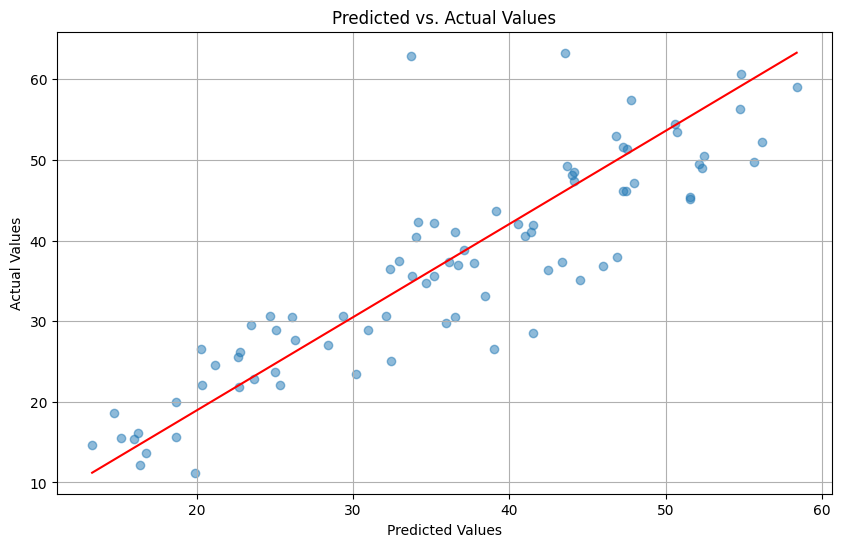

In [12]:
# Predict the values for the test set
y_pred = model.predict(X_test).flatten()  # Flatten to make sure it's the same shape as y_test

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], color='red')  # Line showing perfect predictions
plt.grid(True)
plt.show()


Here we can see our Predicted vs. Actual. We have a fitted line (similar to Linear Regression) with a slope very close to 1, meaning it is almost an exact match. Since not all predicted values are exactly equal to our actual values, we can interpret it as the model is not overfitting. Let's see how well the Neural Network works for classification using our Breast Cancer dataset.

In [88]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
y = y.values
X = X.values
y = np.where(y == 'B', 0, 1)
y = y.ravel()

In [89]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, input_shape=(30,), activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Our model structure for classification is extremely similar to regression, except our we only use 2 layers instead of 3. We also included 'Droput Layers' to prevent overfitting.

Finally, our Loss function 'binary_crossentropy' is for binary classification problems where the target data is provided as 0 and 1. We also measure are accuracy through 'Accuracy', to gauge how many predictions we get correct.

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


In [92]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

4/4 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9561
Test Accuracy: 0.9561403393745422


Here we can see our model has an accuracy of 95%, which is a great sign. Let's look at the predicted vs actual through a confusion matrix.

In [99]:
# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels (0 or 1) based on a threshold (e.g., 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


4/4 [==============================] - 0s 3ms/step
Confusion Matrix:
[[66  5]
 [ 0 43]]


Great! Our model correctly predicted most, but still got a few wrong which could indicate it did not overfit. Let's move onto the next model.


